Se tiene X e Y variables aleatorias con densidad de probabilidad conjunta:

$$f_{X Y}(x,y) = \frac{3}{4}  𝟙\{0 < y < 1 + x^2, x \in (0,1)\}$$

1. Calcular esperanza condicional
2. Calcular error bayesiano
3. Calcular recta de regresión
---

### 1. Calcular esperanza condicional:
$f_{XY}(x,y)$ se puede reescribir como 
$$
f_{XY}(x,y) = \frac{1}{1+x^2}𝟙\{0<y<1+x^2\} \cdot \frac{3}{4}(1+x^2)𝟙\{x \in (0,1)\}
$$
donde el primer término corresponde a la distribución condicional de Y: $f_{Y|X=x}$ y la segunda es la distribución marginal de x: $f_x$. Entonces se puede decir que $Y|X=x \sim U(0,1+x^2)$. 
$$
\mathbb{E}[Y|X=x] = \frac{1+x^2}{2} 
$$


### 2. Calcular error bayesiano
El error bayesiano se define como $\mathbb{E}[var(Y|X)]$.
Como la varianza de una variable uniforme $u \sim U(a,b)$ es $= \frac{(b-a)^2}{12}$
$$
var(Y|X)  =\frac{(1+x^2)^2}{12}
$$
$$
\implies \mathbb{E}[var(Y|X)] = \int_0^1 var(Y|X)f_X(x)dx = \int_0^1 \frac{(1+x^2)^3}{16}dx = \frac{6}{35}
$$

### 3. Calcular recta de regresión:
La aproximación de Y a través de la recta de regresión de X es $\hat{Y}= aX+b$ para algunos específicos $ a,b \in \mathbb{R}$ y se cumple que $\mathbb{E}[(Y-\hat{Y})^2]$ es mínima cuando $a = \frac{cov(X,Y)}{var(X)}$ y $b= \mathbb{E}[Y] - a\mathbb{E}[X]$. 

Para calcular los valores de a y b se requieren $\mathbb{E}[X], \mathbb{E}[X^2], \mathbb{E}[X^3], \mathbb{E}[Y], \mathbb{E}[XY], cov(X,Y)$ y $var(X)$. 

- $\mathbb{E}[X] = \int_0^1 x \cdot f_x(x) dx = \int_0^1 x \cdot \frac{3}{4}(1+x^2)dx = \frac{9}{16}$
  
- $\mathbb{E}[X^2] = \int_0^1 x^2 \cdot f_x(x) dx = \int_0^1 x^2 \cdot \frac{3}{4}(1+x^2)dx = \frac{2}{5}$
  
- $\mathbb{E}[X^3] = \int_0^1 x^3 \cdot f_x(x) dx = \int_0^1 x^3 \cdot \frac{3}{4}(1+x^2)dx = \frac{5}{16}$

- $\mathbb{E}[Y] = \mathbb{E}[\mathbb{E}[Y|X]] = \mathbb{E}[\frac{1+X^2}{2}] = \frac{1}{2}(1+ \mathbb{E}[X^2]) = \frac{1}{2}(1+\frac{2}{5}) = \frac{7}{10}$

- $\mathbb{E}[XY] = \mathbb{E}[X \cdot \mathbb{E}[Y|X]] = \mathbb{E}[X \cdot \frac{1+X^2}{2}] = \frac{1}{2}(\mathbb{E}[X] + \mathbb{E}[X^3]) = \frac{1}{2}(\frac{9}{16} + \frac{5}{16}) = \frac{7}{16}$

- $cov(X,Y) = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] = \frac{7}{16}- \frac{9}{16} \cdot \frac{7}{10} = \frac{7}{160}$

- $var(X) = \mathbb{E}[X^2] - \mathbb{E}[X]^2 = \frac{2}{5} - (\frac{9}{16})^2 = \frac{107}{1280}$

$$
a = \frac{cov(X,Y)}{var(X)} = \frac{\frac{7}{160}}{\frac{107}{1280}} = \frac{56}{107}
$$

$$
b = \mathbb{E}[Y] - a\mathbb{E}[X] = \frac{7}{10} - \frac{56}{107} \cdot \frac{9}{16} = \frac{217}{535}
$$

$$
\hat{Y} = \frac{56}{107}X + \frac{217}{535}
$$

In [67]:
import numpy as np
n_samples = 500
dataset = []
while len(dataset) < n_samples:
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,2)
    if y<=1+ x**2:
        dataset.append((x, y))
dataset = np.array(dataset)


In [68]:
class reglin_matricial:
    def __init__(self):
        self.w_ = 0
        self.b_ = 0
    def fit(self, train_data):
        # saco la dimensión de los datos
        n = train_data.shape[0]
        # concateno un vector de unos a la matriz de datos
        X = np.c_[np.ones(n), train_data[:,0]]
        # la siguiente columna corresponde a los valores de y
        y = train_data[:,1]
        # calculo el vector de pesos
        w_vector = np.linalg.inv(X.T @ X) @ X.T @ y
        self.b_ = w_vector[0]
        self.w_ = w_vector[1]
    def predict(self, x):
        return self.w_ * x + self.b_
    

In [89]:
reglin = reglin_matricial()
reglin.fit(dataset)
# predicción para x = 0.25 (256GB)
y_256GB = reglin.predict(0.25)
print(f'w = {reglin.w_.round(3)}', f'b = {reglin.b_.round(3)}')
print(f'{y_256GB.round(3)} días')

w = 0.484 b = 0.418
0.539 días


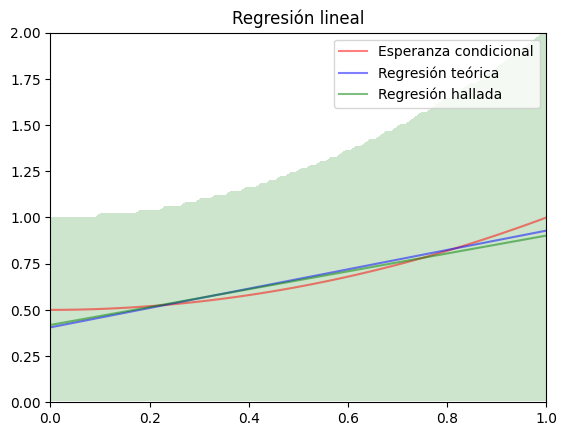

In [113]:
import matplotlib.pyplot as plt
x_range = np.linspace(0,1,100)
y_range = np.linspace(0,2,100)
X, Y = np.meshgrid(x_range, y_range)
soporte = (Y>0) & (Y<=1+X**2)
esperanza_condicional = (1+x_range**2)/2
reglin_teorica = (56*x_range)/107 + (217/535)
reglin_hallada = reglin.predict(x_range)
ax, fig = plt.subplots()
fig.contourf(X, Y, soporte, alpha=0.2, colors=['white', 'green'])
fig.plot(x_range, esperanza_condicional, color='red', alpha = 0.5, label = 'Esperanza condicional')
fig.plot(x_range, reglin_teorica, color='blue', alpha = 0.5, label = 'Regresión teórica')
fig.plot(x_range, reglin_hallada, color='green', alpha = 0.5, label = 'Regresión hallada')
fig.set_xlabel = "Capacidad de almacenamiento (TB)"
fig.set_ylabel = 'Duración de batería (días)'
plt.title('Regresión lineal')
fig.legend()
plt.show()



In [85]:
class reglin_gd:
    def __init__(self, lr = 0.1, max_iter = 1000):
        self.lr = lr
        self.n_iter = max_iter
        self.w_ = 0
        self.b_ = 0
    def fit(self, train_data):
        n = train_data.shape[0]
        X = np.c_[np.ones(n), train_data[:,0]]
        y = train_data[:,1]
        w_vector = np.zeros(2)
        for _ in range(self.n_iter):
            # w_{t+1} = w_t -  lr * gradiente(MSE(w_t))
            w_vector = w_vector - self.lr * (X.T @ (X @ w_vector - y))/n
        self.b_ = w_vector[0]
        self.w_ = w_vector[1]
    def predict(self, x):
        return self.w_ * x + self.b_

In [90]:
reglin2 = reglin_gd()
reglin2.fit(dataset)
y_256GB_gd = reglin2.predict(0.25)
print(f'w = {reglin2.w_.round(3)}', f'b = {reglin2.b_.round(3)}')
print(f'{y_256GB_gd.round(3)} días')

w = 0.483 b = 0.419
0.539 días
